# Ein einfaches lineares Modell
Datenquelle: http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights

Synthetischer Datensatz mit Körpergröße und Körpergewicht von 18-jährigen.

In [17]:
# Import libraries
import math
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

### Data preparation

In [18]:
# Todo: Load data

import os


data = pd.read_csv(os.getcwd() + '/Height_weight.csv')


print(f'Number of entries in dataframe: {len(data)}')
data.head()

Number of entries in dataframe: 200


,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [19]:
# Todo: Rename columns to 'H' and 'W'
data.columns =  ['H', 'W']

data.head()

,H,W
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [20]:
# Todo: Convert to SI units
# Conversion factor inches:cm -> 1:2.54
# Conversion factor pounds:kg -> 1:0.45359237

data['H'] = [ h * 2.54     for h in data['H']]
data['W'] = [ w * 0.45359237    for w in data['W']]

data.head()

,H,W
0,167.0812,51.251402
1,181.6608,61.910823
2,176.2760,69.413240
3,173.2788,64.564338
4,172.1866,65.453379


Define independent and dependent variables

In [21]:
# Todo: Height is independent variable, weight is dependent variable
X = np.array(data[ 'H'  ]).reshape(-1, 1)
y = np.array(data[ 'W'  ]).reshape(-1, 1)

### Modelling

In [22]:
# Linear regression model
model = linear_model.LinearRegression()
model = model.fit(X,y)

In [23]:
# Get model parameters y=mx+b
print(f'Slope is m = {model.coef_.T[0][0]}')
print(f'Intercept is b = {model.intercept_[0]}')

Slope is m = 0.6130061814640727
Intercept is b = -48.093358653767005


### Evaluation

In [24]:
# Todo: Get prediction on data
y_pred = model.predict(X)

# Todo: Evaluation with Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Todo: Evaluation with Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Todo: Print metrics
print(f'MAE: {  mae  :.2f}\nMSE: { mse   :.2f}\nRMSE: { math.sqrt(mse)   :.2f}')

MAE: 3.52
MSE: 20.21
RMSE: 4.50


### Visualization

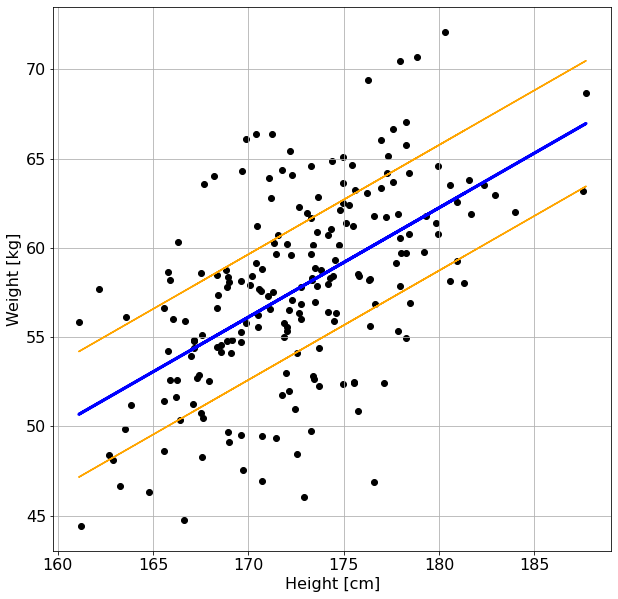

In [25]:
# Visualize predictions
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 16})

plt.scatter(X, y,  color='black')
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.plot(X, y_pred + mae, color='orange')
plt.plot(X, y_pred - mae, color='orange')

plt.xlabel('Height [cm]')
plt.ylabel('Weight [kg]')

plt.grid(True)
plt.show()

### Statistical evaluation

In [26]:
# Calculate correlation and p-value
corr, pval = pearsonr(X[:,0], y[:,0])
print(f'Correlation: {corr:0.2f}\np-value: {pval}')

Correlation: 0.56
p-value: 1.1029015151266672e-17
